# Terahertz conversion effeciency

Using a model that accounts for cascaded optical rectification, three-photon absorption of the near-infrared radiation, and material dispersion/absorption properties, we describe the Terahertz generation through optical rectification of near-infrared femtosecond pulses in DSTMS.

## Dispersion and absorption properties 

1. Using Lorentz model, we interpolate the refractive index of the nonlinear optical crystal (DSTMS) in the THz range. The oscillator parameters are based on the data extracted from "Montemezzani, G. et al. J. Opt. Soc. Am. B 32, 1078-1083 (2015)"
2. Using Sellmeier model, we interpolate the refractive index of the nonlinear crystal in the optical range. The parameters are based on the data extracted from "[]"
3. How do we determine the dispersion from the optical to terahertz region?

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

from optical_rectification import definitions, par

# constants
c = 299792458.0  # speed of light [m/s]
eps0 = 8.85e-12  # vacuum permitivity [C^2 / Kg^1 / m^3 /s^2]

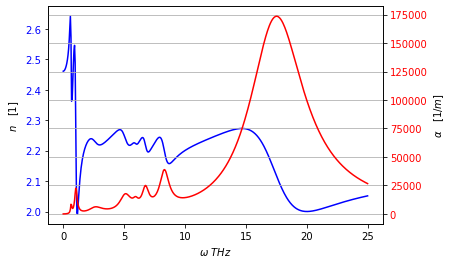

In [2]:
# Visualize refractive index in THz region
fig, ax1 = plt.subplots()

w = np.linspace(0.01, 25, 2**9)  # [THz]
index_thz = definitions.Index(w);
n_thz = index_thz.n()
alpha_thz = index_thz.alpha()

ax1.plot(w, n_thz, 'b')
ax1.set_xlabel(r'$\omega$ $THz$')
ax1.set_ylabel(r"$n \quad [1]$")
ax1.tick_params(axis='y',labelcolor='b')
ax2 = ax1.twinx()  # Create a second axes object that shares the same x-axis
ax2.plot(w, alpha_thz, 'r')
ax2.set_ylabel(r"$\alpha \quad [1/m]$")
ax2.tick_params(axis='y',labelcolor='r')
plt.grid(True)

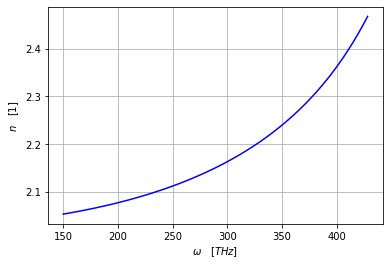

In [3]:
# Visualize refractive index in Optical region
fig, ax3 = plt.subplots()

# paramters in optical region
q = 1.45; n_inf = 2.026; # [1] 
lam0 = 532; # [nm]
# graph
lam = np.linspace(700, 2000, 2**14)  
index_opt = definitions.Index(lam);
n_opt = index_opt.sellmeier(n_inf, lam0, q);
ax3.plot(c/(lam*1e-9)*1e-12, n_opt, 'b')
ax3.set_xlabel(r'$\omega \quad [THz]$')
ax3.set_ylabel(r"$n \quad [1]$")
ax3.tick_params(axis='y',labelcolor='k')
plt.grid(True)

## The Input Gaussian Pulse

The intensity profile of the input Gaussian pulse is
\begin{equation}
    I(t) = \frac{cn\epsilon_0}{2} \vert E_0 \vert^2 \exp[ -2t^2/\tau^2 ],
\end{equation}
with $c$, $\epsilon_0$, and $n$ as the speed of light in vacuum, permittivity of free space, and
refractive index of the medium, respectively. The full width at half-maximum FWHM, ${\Delta}t = 0.075 \: ps$, of the Gaussian wave packet in the time domain, defines $\tau$, such that
\begin{equation}
    \tau = \frac{\sqrt{2}{\Delta}t}{{2\sqrt{{\rm ln}(2)}}}.
\end{equation}
Noting that $I(t) \propto \vert E(t) \vert^2$, the electric field is given by 
\begin{equation}
    E(t) = E_0 \exp[ -t^2/\tau^2 ] e^{-i \omega_0 t}.
\end{equation}
where $\omega_0$ is the carrier-wave frequency.

Applying the Fourier Transfrom $\mathcal{F}$ yields the field distribution in the frequency domain
\begin{equation}
\begin{split}
    E(\omega) &= \mathcal{F}\{ E(t) \}
    \\
    &= E_0\sqrt{\pi}\tau \exp[ - \Delta^2/\delta^2 ],
\end{split}
\end{equation}
where $\Delta = \omega_0 - \omega$, and $\delta=2/\tau$. Thus the spectral intensity is
\begin{equation}
    I(\omega) = \frac{cn\epsilon_0}{2} \vert E_0 \sqrt{\pi}\tau \vert^2 \exp[ - 2\Delta^2/\delta^2 ].
\end{equation}
This yields the FWHM in the frequency domain, i.e. the bandwith $\Delta\omega$, such that
\begin{equation}
    \Delta\omega = \frac{\delta}{\sqrt{2}}2\sqrt{{\rm ln}(2)}.
\end{equation}
This result yields the well known time-bandwidth product of a Fourier transform–limited pulse, such that
\begin{equation}
\begin{split}
    {\Delta}t{\Delta}\nu &= \frac{{\Delta}t{\Delta}\omega}{2\pi}
    \\
        &= \frac{\tau\delta}{2\pi\left(\sqrt{2}\right)^2}4{\rm ln}(2)
    \\
        &= 0.441.
\end{split}
\end{equation}

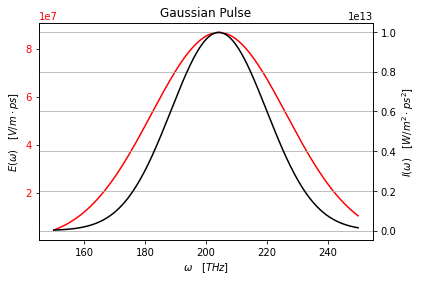

In [4]:
# Example Gaussian Pulse
w0 = definitions.c / 1468e-9 *1e-12  # [THz]
t_fwhm = 75e-15 * 1e12  # [ps]
E0 = 5.4315195283 * 1e8  # [V/m]
w = np.linspace(150, 250, 2**10)  # [THz] domain
pulse = definitions.Gaussian(w0=w0, t_fwhm=t_fwhm, E0=E0)

fig, ax = plt.subplots()
ax.plot(w, pulse.field_w(w), 'r')
ax.set_title("Gaussian Pulse")
ax.set_xlabel(r"$\omega \quad [THz]$")
ax.set_ylabel(r"$E(\omega) \quad [V/m\cdot ps]$")
ax.tick_params(axis='y',labelcolor='r')
ax1 = ax.twinx()
ax1.plot(w, (eps0*c/2)*np.abs(pulse.field_w(w))**2, 'k')
ax1.set_ylabel(r"$I(\omega) \quad [W/m^2 \cdot ps^2]$")
ax1.tick_params(axis='y',labelcolor='k')

plt.grid(True)
plt.show()

## Second order nonlinear mixing terms

The $\chi^2$ nonlinearity induces frequency mixing between the optical and terahertz fields. This yields correlation terms of the form
\begin{equation}
    C(\Omega) = \int_0^{\infty} d\omega \: E(\omega+\Omega) E^{*}(\omega).
\end{equation}
We approximate $C(\Omega) \approx C(k)$; $C(k)$ is the Reiman sum
\begin{equation}
    C(k) = \Delta\omega \sum_{n=0}^{N-k-1} E(\omega_{n+k}) E^{*}(\omega_n),
\end{equation}
where $\omega_n = n\Delta\omega$, $\Omega_k = k\Delta\omega$, so that $\omega_{n+k} = \omega_n + \Omega_k$. Here $N\rightarrow\infty$ for $E(\omega_N) \rightarrow 0$.
The code below implements $C(k)$, for a field $E(\omega)$ with a Gaussian envelop as described in the above section.

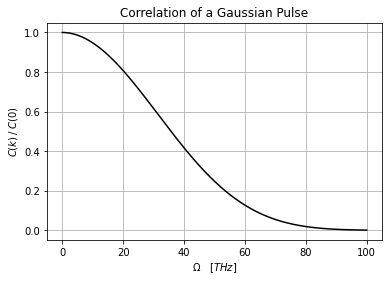

In [18]:
# variables
dw = w[1] - w[0]
N = max(w) - min(w); kmax = int(N / dw)
kvals = np.arange(0, kmax + 1)
Ω = kvals * dw

C_k = [definitions.corr(pulse.field_w(w), dw, k) for k in kvals]
# norm = abs(pulse.E0_w)**2 * (np.sqrt(2*np.pi) / pulse.tau)
norm = C_k[0]

fig4, ax7 = plt.subplots()
ax7.plot(Ω, C_k / norm, 'k')
ax7.set_title("Correlation of a Gaussian Pulse")
ax7.set_xlabel(r"$\Omega \quad [THz]$")
ax7.set_ylabel(r"$C(k) \: / \: C(0)$")
ax7.tick_params(axis='y',labelcolor='k')
plt.grid(True)